# Arbeidskrav 4 - SOK 1005
*Simon Olsen*

Formålet med denne oppgaven er å undersøke om elbilprodusenters oppgitte WLTP-rekkevidde stemmer overens med faktisk rekkevidde målt i en vintertest.

1) Skrap den angitte nettsiden og lagre resultatet i en dataramme

In [82]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Laster ned linken
url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Henter ut alle tabeller på siden
tables = pd.read_html(response.text)

# Printer hvor mange tabeller det finnes på nettsiden
print(f"Fant {len(tables)} tabeller")


Fant 2 tabeller


C:\Users\simon\AppData\Local\Temp\ipykernel_37484\3777840280.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


2) Vask dataen til en tabell med bare relevante tall og gode overskrifter ved det følgende:

a) Del kolonnen med WLTP-tall i to: en for kjørte km og en for energibruk.

b) Hvis en kolonne har benevninger: legg alle benevningene til overskriften for kolonnen
slik at det bare er tall i kolonnene.

c) Fjern rader med meningsløse eller manglende verdier fra datasettet

In [83]:
# Velger den første av to tabeller vi vant på nettsiden og lager en kopi.
df = tables[0].copy()

#Rydder i kolonnenavn. Fjerner mellomrom og gjør navnene enklere å jobbe med
df.columns = [col.strip() for col in df.columns]


In [84]:
#Oppgave 2a

# Del opp WLTP-verdiene i to kolonner: rekkevidde_km og energibruk_kWh
df[['rekkevidde_km', 'energiforbruk_kWh']] = df['WLTP-tall'].str.extract(r'(\d+)\s*km\s*/\s*([\d,]+)')

# Konverterer til riktige datatype
df['rekkevidde_km'] = pd.to_numeric(df['rekkevidde_km'], errors='coerce')
df['energiforbruk_kWh'] = df['energiforbruk_kWh'].str.replace(',', '.').astype(float)

# Sletter originalkolonnen
df.drop(columns=['WLTP-tall'], inplace=True)


In [85]:
#Oppgave 2b

# Endre kolonnenavn
df.rename(columns={'STOPP': 'stop_km'}, inplace=True)

# Rydder i verdiene: fjern "km", erstatter x med na verdi og konverter til float
df['stop_km'] = (
    df['stop_km']
    .str.replace(' km', '', regex=False)
    .replace(['x'], np.nan)
    .astype(float)
)


In [86]:
#Oppgave 2c

# Fjern rader som mangler verdi i denne kolonnen
df.dropna(subset=['stop_km'], inplace=True)

df

,Modell (temp. varierte fra 0° til -10°),stop_km,Avvik,rekkevidde_km,energiforbruk_kWh
0,Tesla Model 3 LR Dual motor,521.0,"-15,15 %",614,14.7
1,Mercedes-Benz EQS 580 4matic,513.0,"-20,47 %",645,18.3
2,BMW iX xDrive50,503.0,"-14,89 %",591,21.4
3,Tesla Model Y LR Dual motor,451.0,"-11,05 %",507,16.9
4,Volkswagen ID.3 PRO S,435.0,"-19,29 %",539,16.3
5,Kia EV6 2WD,429.0,"-18,75 %",528,16.5
6,NIO ES8 LR 7-seter,425.0,"-12,91 %",488,21.5
7,Kia EV6 4WD,423.0,"-12,60 %",484,18.0
8,Volkswagen ID.4 Pro,414.0,"-14,64 %",485,18.4
9,Hyundai Ioniq 5 2WD,408.0,"-15,18 %",481,16.8


3) Lag en ny kolonne der forholdet mellom leverte antall kilometer og påståtte antall kilometer er
angitt.

In [87]:
#Oppgave 3

# Lager ny kolonne med forholdet mellom faktisk og oppgitt rekkevidde
df['forhold'] = df['stop_km'] / df['rekkevidde_km']

df

,Modell (temp. varierte fra 0° til -10°),stop_km,Avvik,rekkevidde_km,energiforbruk_kWh,forhold
0,Tesla Model 3 LR Dual motor,521.0,"-15,15 %",614,14.7,0.848534
1,Mercedes-Benz EQS 580 4matic,513.0,"-20,47 %",645,18.3,0.795349
2,BMW iX xDrive50,503.0,"-14,89 %",591,21.4,0.851100
3,Tesla Model Y LR Dual motor,451.0,"-11,05 %",507,16.9,0.889546
4,Volkswagen ID.3 PRO S,435.0,"-19,29 %",539,16.3,0.807050
5,Kia EV6 2WD,429.0,"-18,75 %",528,16.5,0.812500
6,NIO ES8 LR 7-seter,425.0,"-12,91 %",488,21.5,0.870902
7,Kia EV6 4WD,423.0,"-12,60 %",484,18.0,0.873967
8,Volkswagen ID.4 Pro,414.0,"-14,64 %",485,18.4,0.853608
9,Hyundai Ioniq 5 2WD,408.0,"-15,18 %",481,16.8,0.848233


4) Lag en regresjonsmodell av typen 𝑓(𝑥) = 𝑎𝑥 + 𝑏 der WLTP-km er uavhengig variabel.

In [88]:
#Oppgave 4

# Forbered input til modellen
X = df['rekkevidde_km'].values.reshape(-1, 1)  # x = WLTP-km (uavhengig)
y = df['stop_km'].values                       # y = faktisk rekkevidde (avhengig)

# Finner den beste linjen som passer dataene best
modell = LinearRegression()
modell.fit(X, y)

# Hent ut regresjonskoeffisienter
a = modell.coef_[0]
b = modell.intercept_

# Printer modellen
print(f"Regresjonsmodell: f(x) = {a:.4f}x + {b:.2f}")


Regresjonsmodell: f(x) = 0.8671x + -26.65


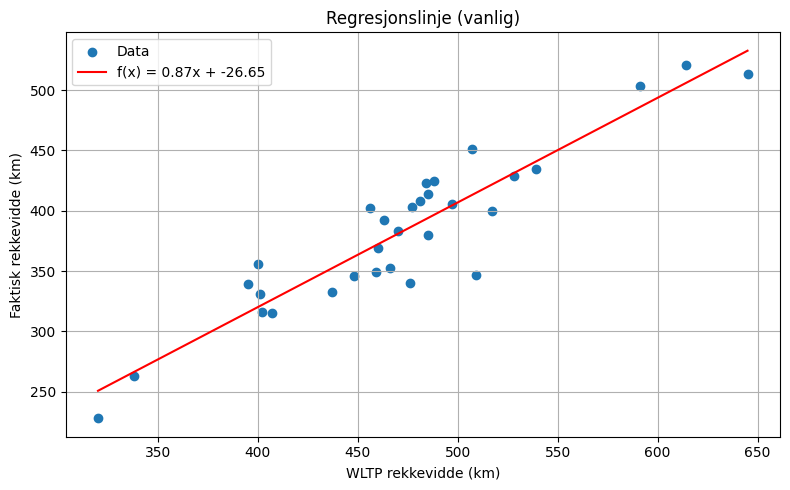

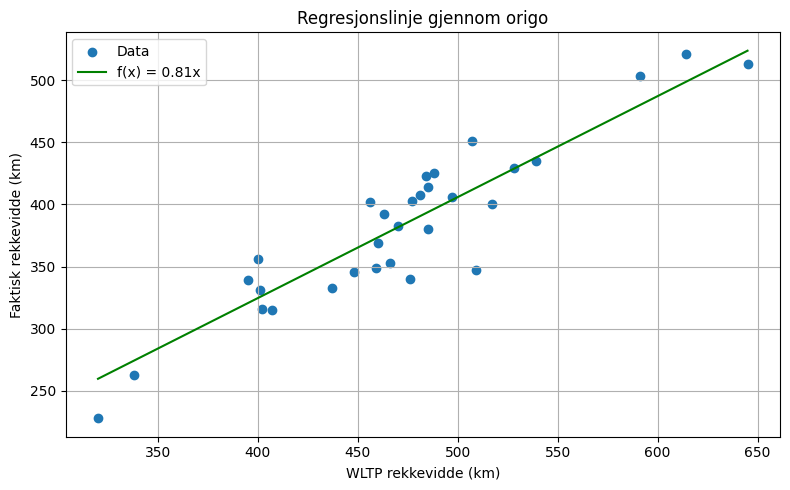

In [ ]:
#Oppgave 5

# Lager WLTP-verdier mellom laveste og høyeste i datasettet
x_vals = np.linspace(df['rekkevidde_km'].min(), df['rekkevidde_km'].max(), 100)

# Bruker modellen til å forutsi faktisk rekkevidde (y-verdier) basert på x-verdiene
y_vals = modell.predict(x_vals.reshape(-1, 1))

# Variant 1: vanlig regresjon
plt.figure(figsize=(8,5))
plt.scatter(df['rekkevidde_km'], df['stop_km'], label='Data')
plt.plot(x_vals, y_vals, color='red', label=f"f(x) = {a:.2f}x + {b:.2f}")
plt.xlabel("WLTP rekkevidde (km)")
plt.ylabel("Faktisk rekkevidde (km)")
plt.title("Regresjonslinje over origo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Variant 2: Tving gjennom origo (ny modell med b = 0)
modell_origo = LinearRegression(fit_intercept=False)
modell_origo.fit(X, y)
a_origo = modell_origo.coef_[0]
y_vals_origo = a_origo * x_vals

plt.figure(figsize=(8,5))
plt.scatter(df['rekkevidde_km'], df['stop_km'], label='Data')
plt.plot(x_vals, y_vals_origo, color='green', label=f"f(x) = {a_origo:.2f}x")
plt.xlabel("WLTP rekkevidde (km)")
plt.ylabel("Faktisk rekkevidde (km)")
plt.title("Regresjonslinje gjennom origo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Oppgave 6

I denne undersøkelsen har vi sett nærmere på om elbilers rekkevidde faktisk samsvarer med produsentenes oppgitte WLTP-rekkevidde. Vi hentet data fra motor.no sin vintertest av elbiler der de testen bilene i temperaturer fra 0 til -10 grader.

Kolonnen forhold viser den faktiske WLTP-rekkevidden fra testen i desimaltall. Tallet er de resterende verdiene av avvik for å nå 100%. Avvik kolonnen viser hvor mange prosent bilene havnet produsentenes WLTP. 

Figurene fra oppgave 5 viser to varianter av regresjonsplottene. Den første viser en regresjonslinje der den starter over origo. Dette kan gi et inntrykk av at bilene gjorde det bedre enn det som er reelt. Den andre figuren viser en regresjonslinje som går igjennom origo. Der ser vi tydeligere at flere biler ligger under regresjonslinjen.

De fleste bilene lå mellom 75 og 90 % av WLTP rekkevidden. Ingen av bilene levde opp til rekkevidden satt av produsentene. Derfor kan vi si at alle bilene underpresterer i forhold til det som er lovet under vinterforhold.


In [90]:
# Regner ut gjennomsnittet på avviket til alle bilene
gjennomsnitt = ((df['stop_km'] / df['rekkevidde_km']).mean() - 1) * 100

print(gjennomsnitt)


-19.072394581274278


I gjennomsnitt lå bilene 19 prosent under det som var lovet av produsentene. Med det kan vi konkludere med at det finnes et systematisk avvik mellom faktisk og oppgitt kjørelengde på elbiler. Vi kan med relativt høy grad si at produsentene ikke holder det de lover når det gjelder rekkevidde under vinterforhold.